In [27]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src") 

import numpy as np
from axitra import *
import matplotlib.pyplot as pt

#%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# 2 sources
# index, lat, lon, depth
sources=np.array([[1, 45.100, 2.000, 5000.000],
                  [2, 45.200, 2.000, 5000.000]])

In [29]:
# 5 receivers with geographical coordinates
# index, lat, lon, depth
stations=np.array(
        [[1, 45.000, 2.000, 0.000],
         [2, 46.000, 1.000, 0.000],
         [3, 46.000, 3.000, 0.000],
         [4, 44.000, 1.000, 0.000],
         [5, 44.000, 3.000, 0.000]])

In [30]:
# 2 layers
# thickness (or top), Vp, Vs, rho, Qp, Qs
model = np.array([[1000., 5000., 2886., 2700., 1000., 500.],
                  [0., 6000., 3886., 2700., 1000., 500.]])

In [31]:
# Fill in the instance of Axitra Class
ap = Axitra(model, stations, sources, fmax=20., duration=50., xl=0., latlon=True, axpath='../src')

In [32]:
# Compute green's function
# fmax = 20Hz
# duration = 50 sec
ap = moment.green(ap)

../src/axitra ran sucessfully


In [33]:
# history of source
hist = np.array([[1,7.5e20,148.0,84.0,-47.0,0.,0.,20.0],
                 [2,7.5e20,148.0,84.0,-47.0,0.,0.,20.0]])

In [34]:
# first convolution example
# source= ricker
# source time width = 3 sec
# output unit = displacement
t, sx, sy, sz = moment.conv(ap,hist,source_type=1,t0=2,unit=1)

source type 1


<IPython.core.display.Javascript object>


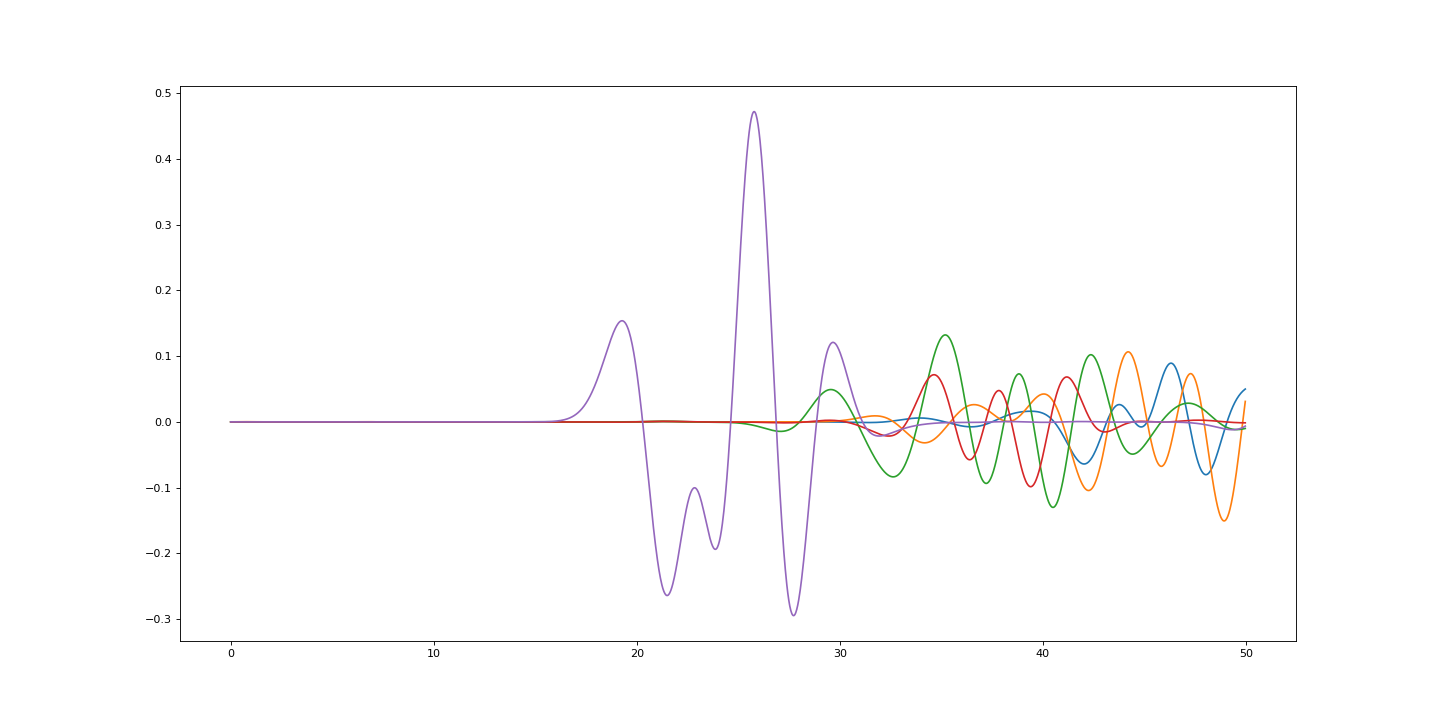

In [35]:
pt.figure(figsize=(18, 9))
ier=pt.plot(t,sx[1,:],t,sx[2,:],t,sx[3,:],t,sx[4,:],t,sx[0,:],)

In [36]:
# convolution with a user provided source function
# A dirac of unit 1 at 10th sample
sfunc = np.zeros((ap.npt,),dtype='float64')
sfunc[100]=1.
del sx, sy, sz
t, sx, sy, sz = moment.conv(ap,hist,source_type=3,t0=1,unit=1,sfunc=sfunc)

source type 3


<IPython.core.display.Javascript object>


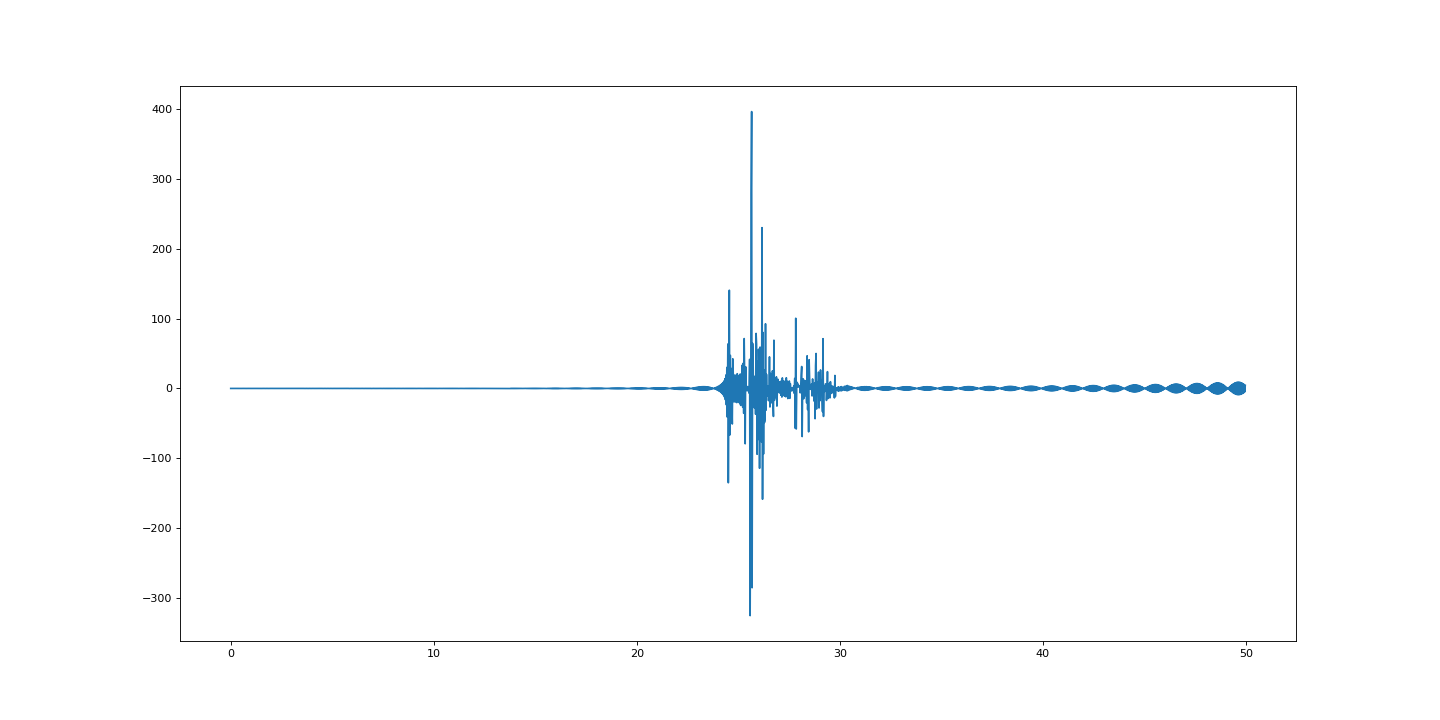

In [37]:
pt.figure(figsize=(18, 9))
ier=pt.plot(t,sx[0,:])#,t,sx[2,:],t,sx[3,:],t,sx[4,:],t,sx[0,:],)

In [38]:
# Run a new instance by reading existing axitra input files
ap2=Axitra.read(str(ap.id),axpath='../src')
# clean files associtated with previous instance
ap.clean()

../src/axitra ran sucessfully
source type 1


<IPython.core.display.Javascript object>


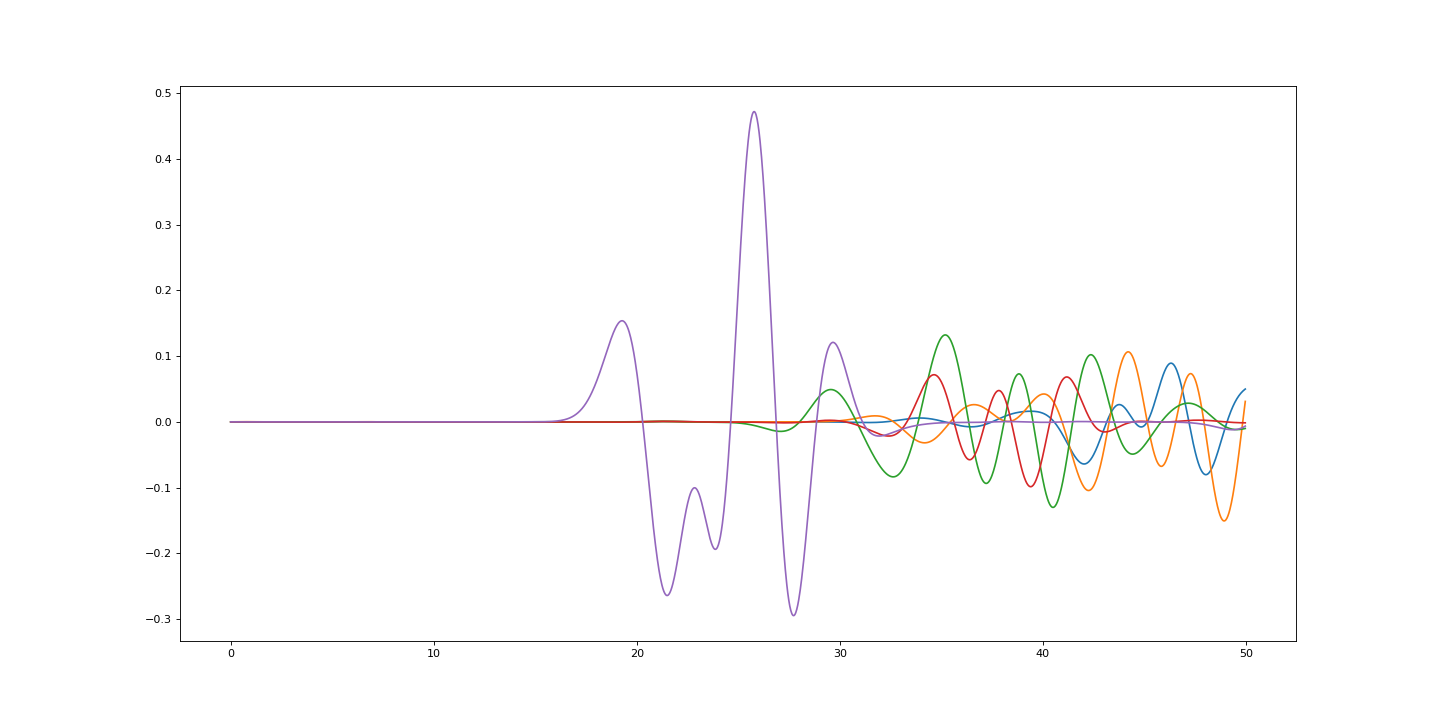

In [39]:
# Run the second instance that should give identical results
moment.green(ap2);
t, sx, sy, sz = moment.conv(ap2,hist,source_type=1,t0=2,unit=1)
pt.figure(figsize=(18, 9))
ier=pt.plot(t,sx[1,:],t,sx[2,:],t,sx[3,:],t,sx[4,:],t,sx[0,:],)

In [40]:
help(moment.green)

Help on method green in module axitra:

green(axitra_param) method of builtins.type instance
    Compute the Green's functions for the set of parameters supplied and for moment tensor sources
    The (6 x nfreq x nsources x nstations) Green's functions are stored in a file on disk, the next step is to
    convolve them with the source function(s) using moment_conv() in order to obtain the
    seismograms.
    
    This function write several input files on disk and call the fortran program "axitra" according
    to the path 'axpath'. The input/output files are of the form "axi_???.suffix" where axi_??? can be obtain
    from the returned Axitra class instance by class.sid
    
    Input parameters:
    - an instance of Axitra class obtained either by class constructor or Axitra.rea()
    
    Return:
    - ap = the instance of Axitra class



In [41]:
help(moment.conv)

Help on method conv in module axitra:

conv(ap, hist, source_type, t0, t1=0.0, unit=1, sfunc=None) method of builtins.type instance
    Compute the convolution of Green's function obtained by a previous call to moment_green()
    by source time functions.
    
    Input:
    ap = Axitra class instance from moment_green
    hist = source history array (nsource x 6)
           index, moment(Nm), strike, dip, rake, 0., 0., delay
           index, slip, strike, dip, rake, width, height, delay
    source_type =
        0 : Dirac
        1 : Ricker
        2 : smooth step (not causal)
        3 : source time function stored in file <header>.sou
        4 : integral of triangle step
        5 : ramp step
        6 : not used....
        7 : True step (watch high frequencies cutoff!!)
        8 : integral of trapezoid step (~Haskel model)
    add +10 to source_type to get only source time function but no convolution
    (useful for checking)
    
    t0 = rise time
    t1 = optional time for s